In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [3]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
bankdata = pd.read_csv('Bank-Customer-Attrition-Insights-Data.csv')

In [4]:
# Display the first few rows of the dataset
bankdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Exploratory Data Analysis
-------------------------------
##  Basic Data Exploration

In [5]:
# Shape of the dataset
print("Dataset Shape:", bankdata.shape)

Dataset Shape: (10000, 18)


In [6]:
# Data types and null values
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
# Summary statistics
bankdata.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [8]:
# Check for missing values
missing_values = bankdata.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


In [9]:
# Dropping the Surname column for data analysis purpose
data = bankdata.copy()
data = data.drop(['Surname'], axis=1, errors='ignore')
data.shape

(10000, 17)

##  Visualize the Target Variable

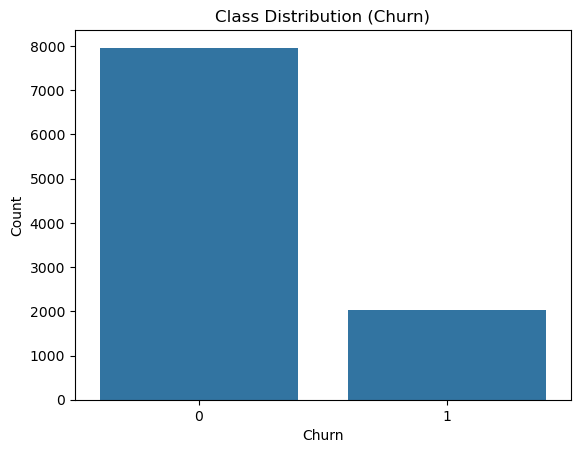


Class Percentages (Churn):
 Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


In [10]:
# Distribution of the target variable
sns.countplot(x='Exited', data=data)
plt.title('Class Distribution (Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Calculate class percentages
class_percentages = data['Exited'].value_counts(normalize=True) * 100
print("\nClass Percentages (Churn):\n", class_percentages)

##  Correlation Analysis

In [11]:
# Compute correlation matrix
correlation_matrix = data.select_dtypes(include=['number']).corr()

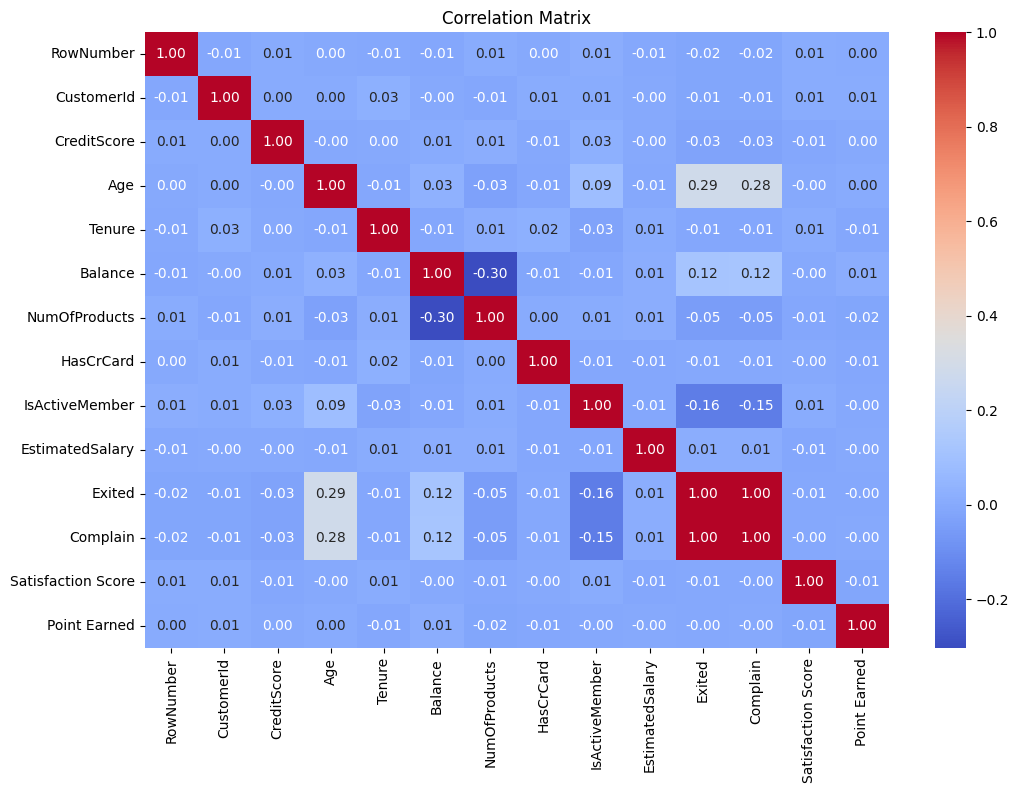

In [12]:
# Plot heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Visualize Numerical Features

In [13]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


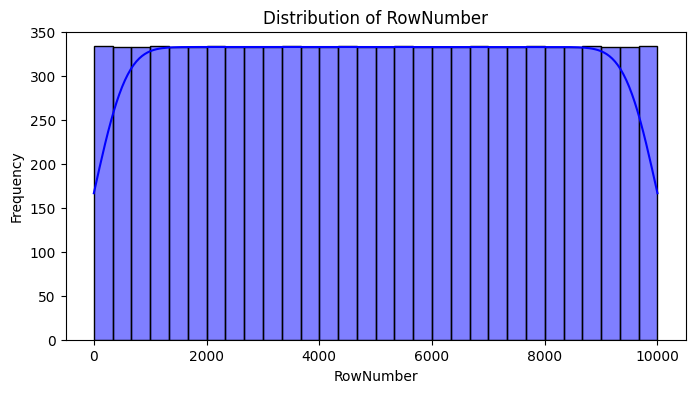

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


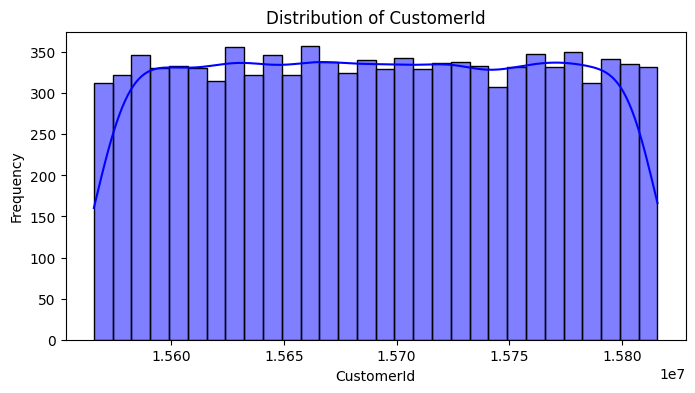

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


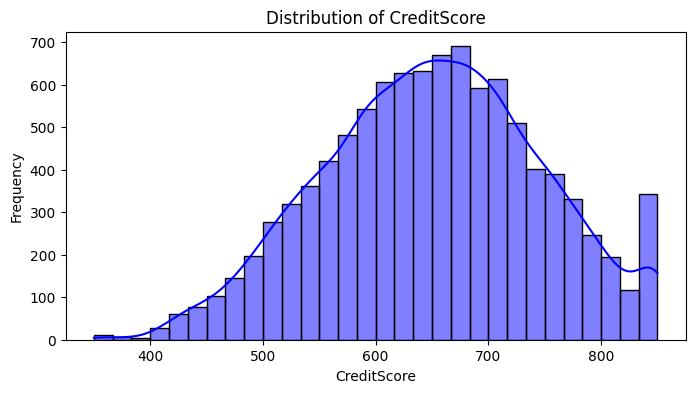

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


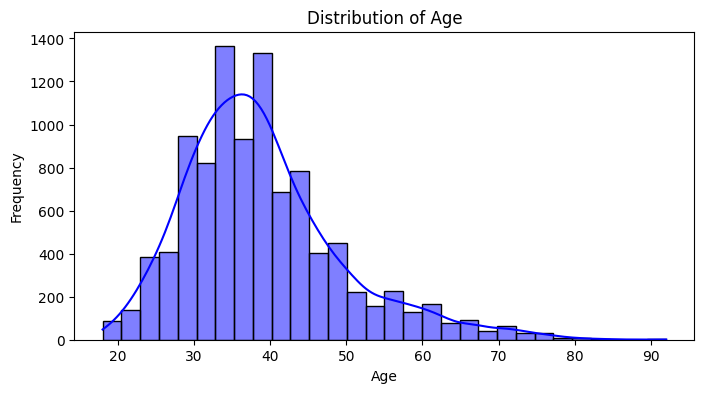

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


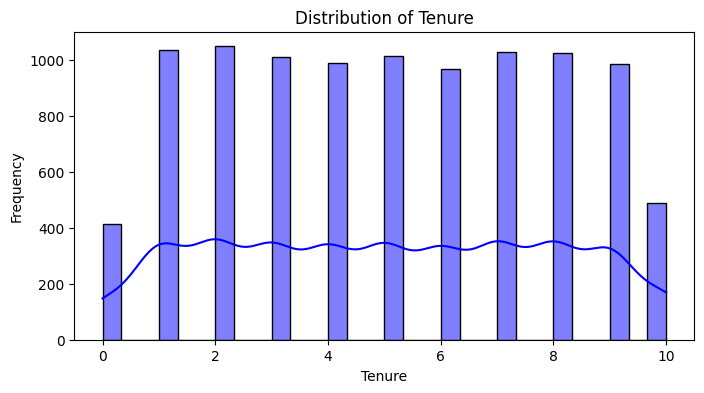

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


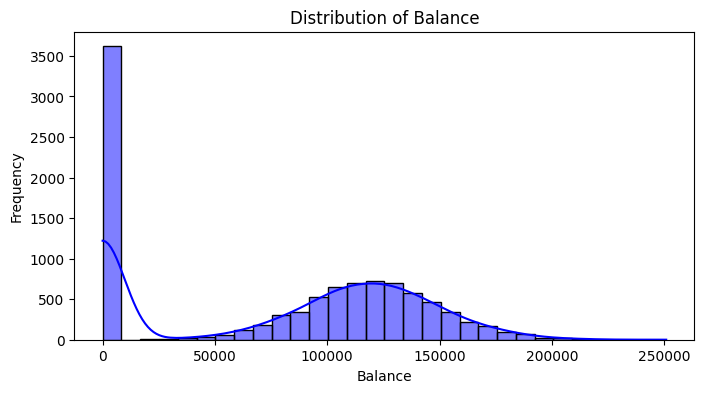

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


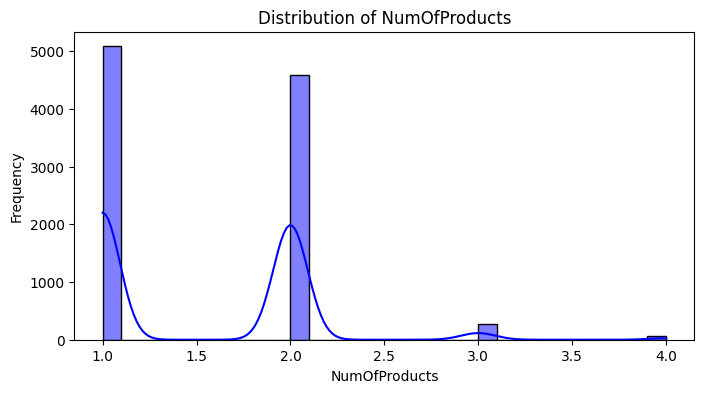

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


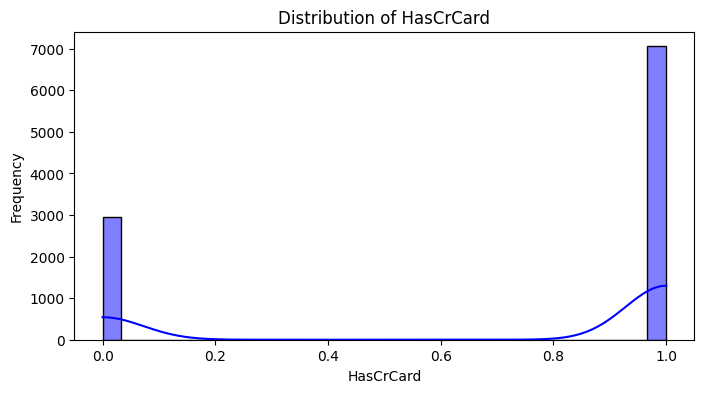

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


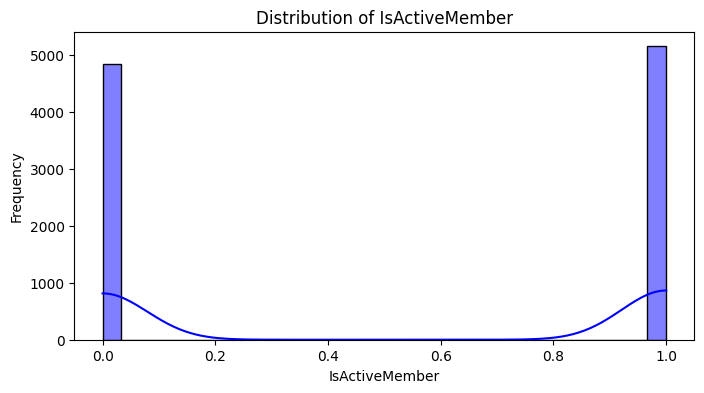

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


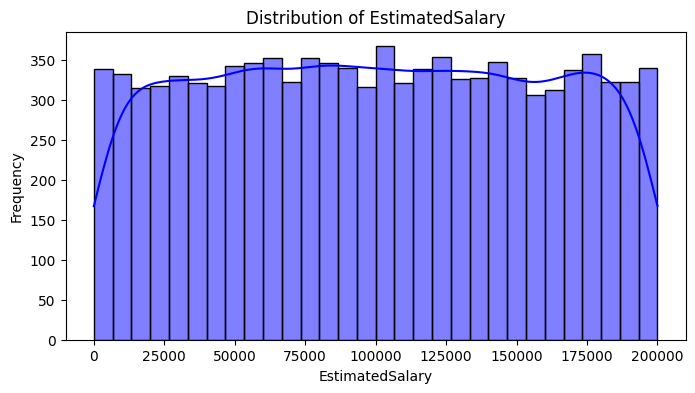

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


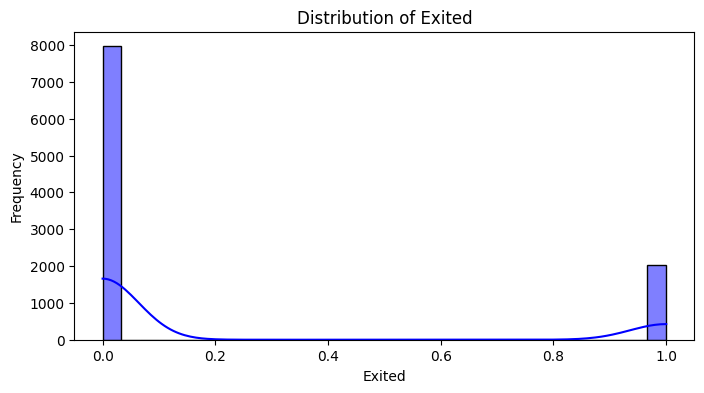

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


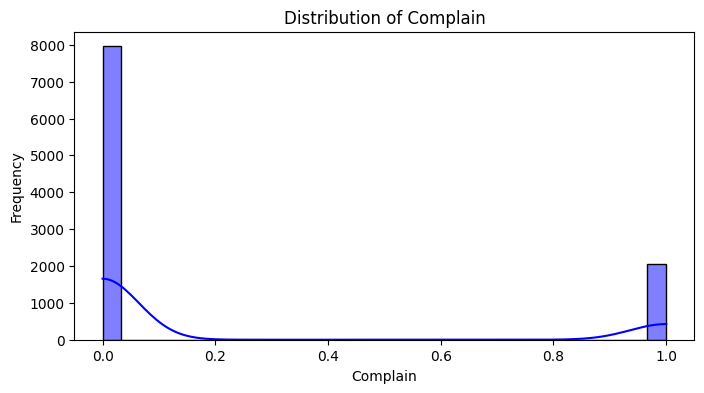

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


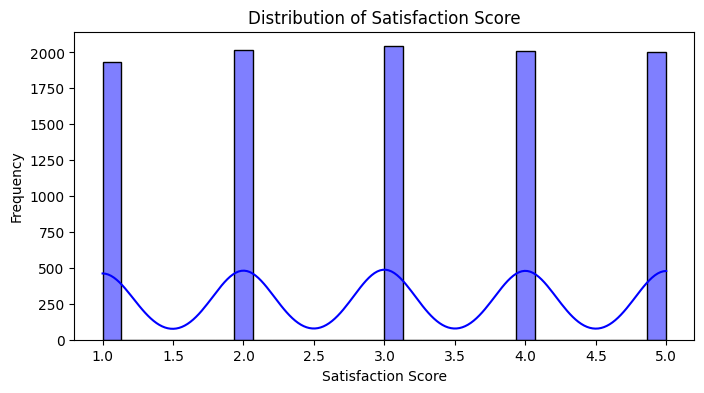

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


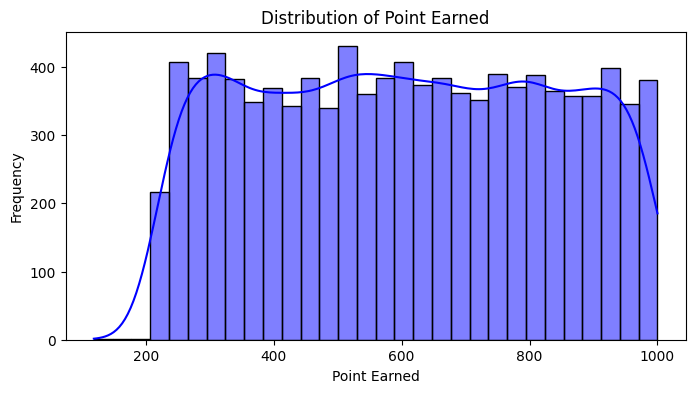

In [14]:
# Distribution plots for numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


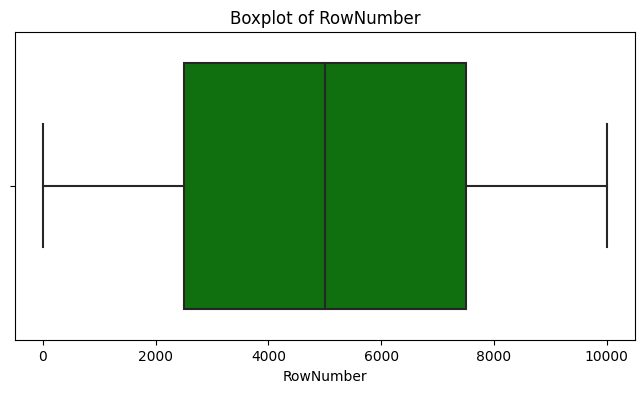

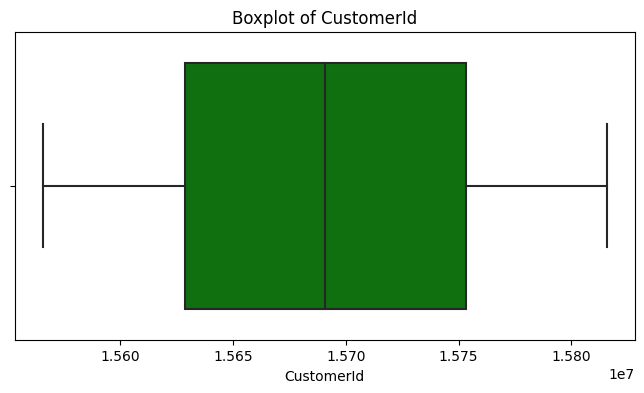

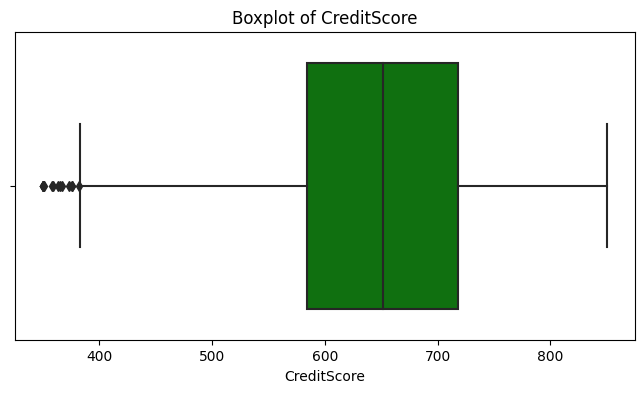

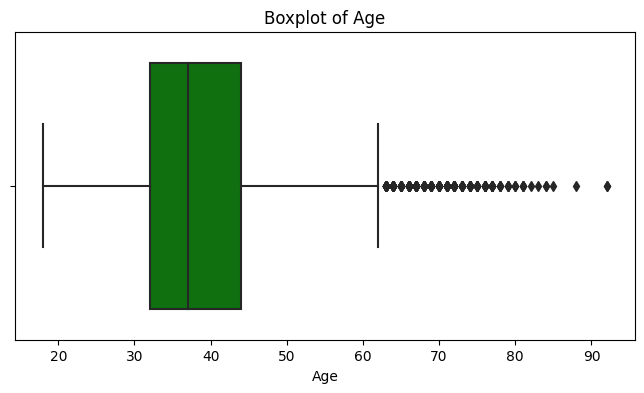

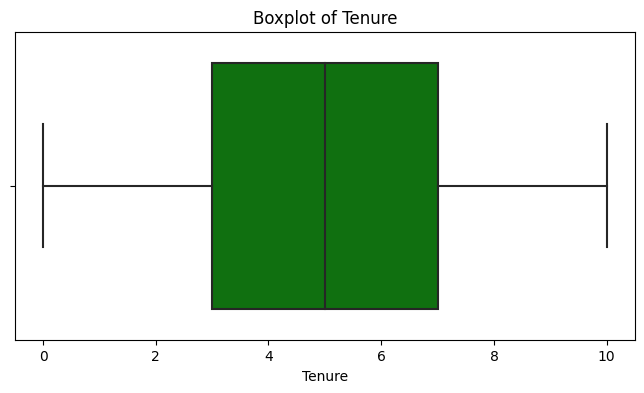

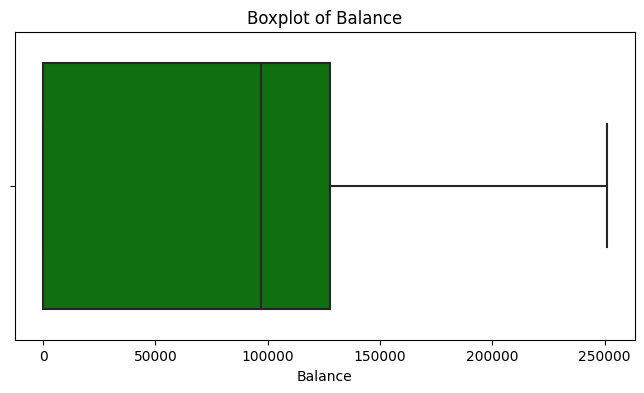

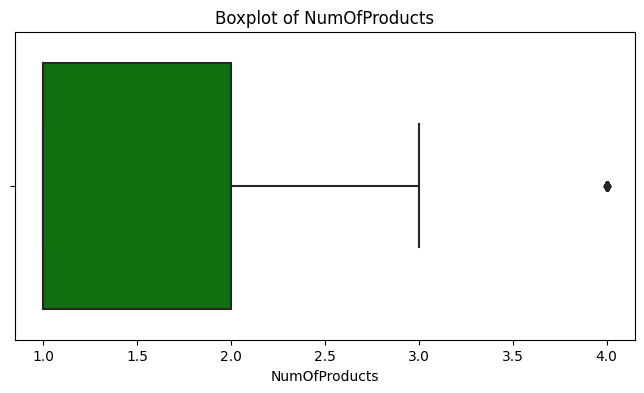

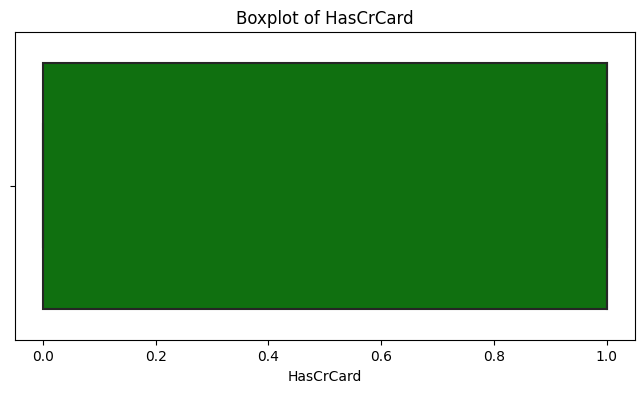

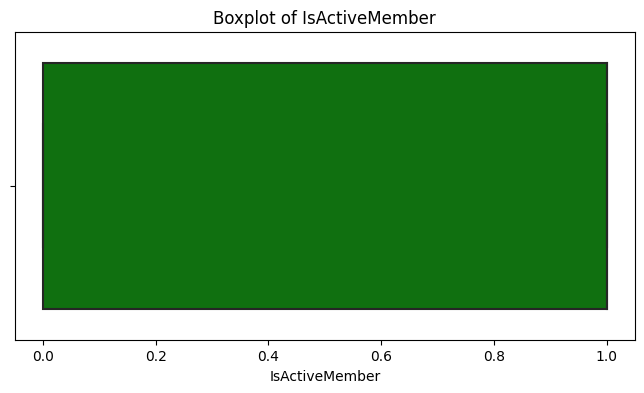

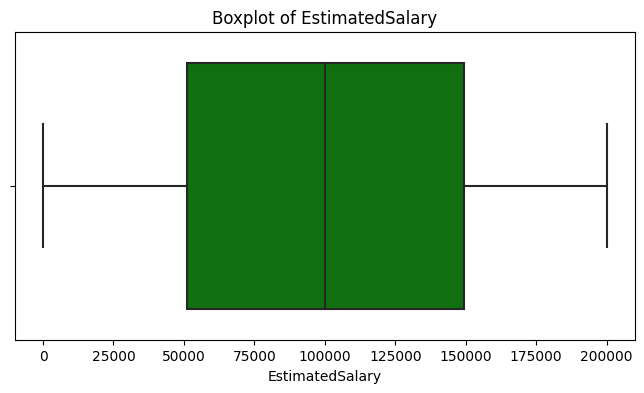

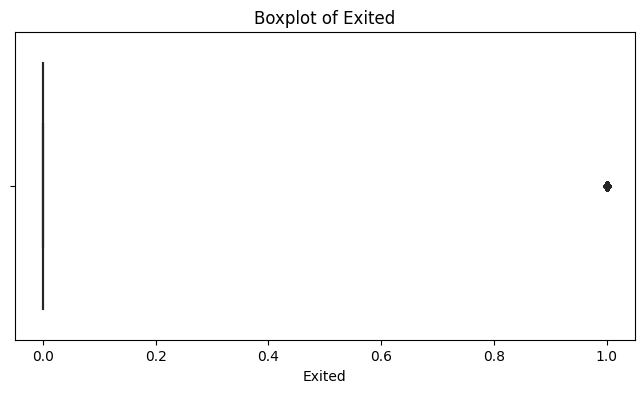

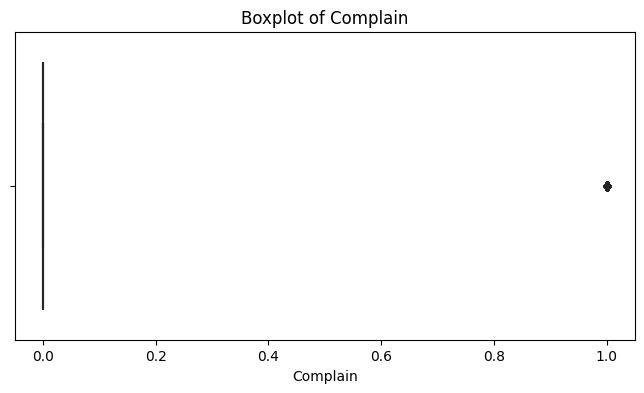

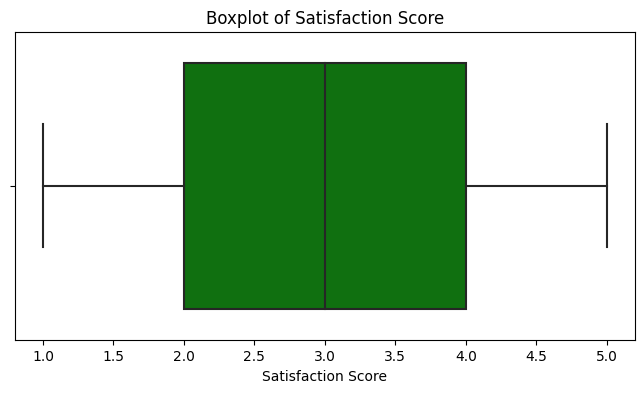

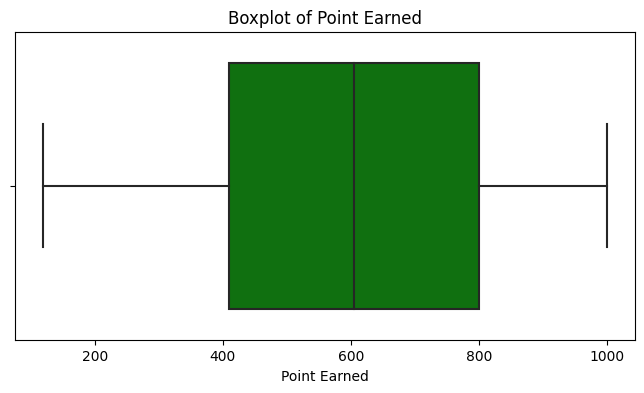

In [15]:
# Boxplots for numerical features to check outliers
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column], color='green')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [16]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

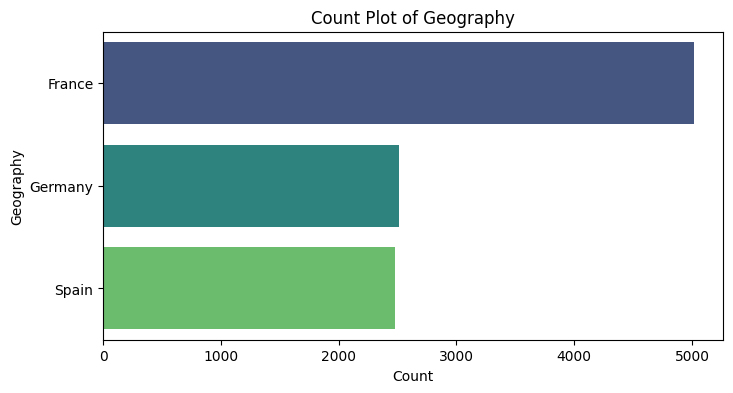

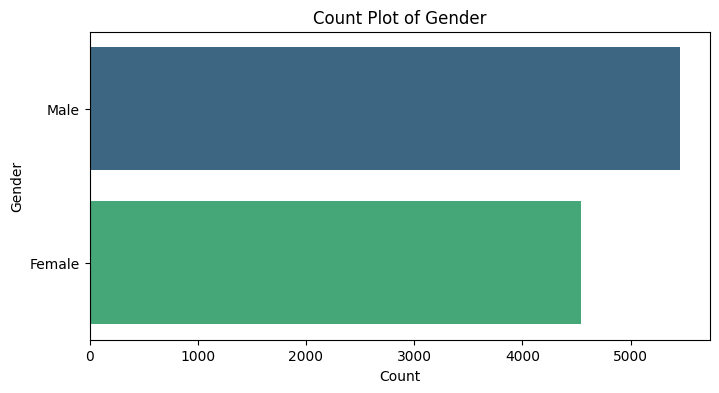

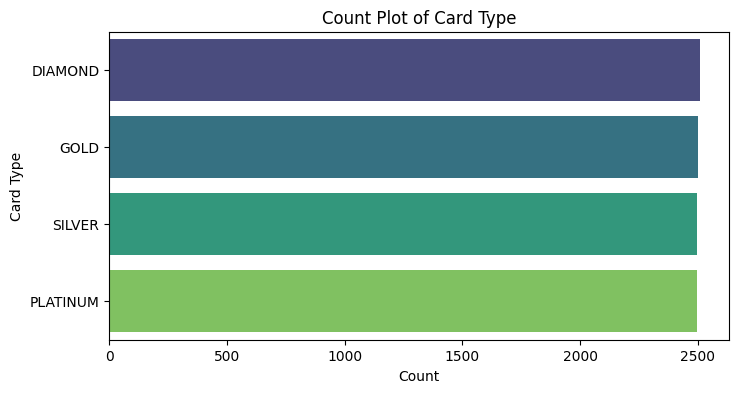

In [17]:
# Count plots for categorical features
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[column], palette='viridis', order=data[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

##  Relationship Between Features and Target

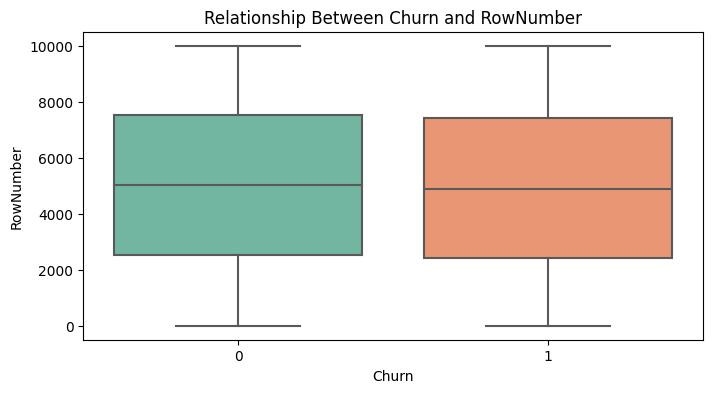

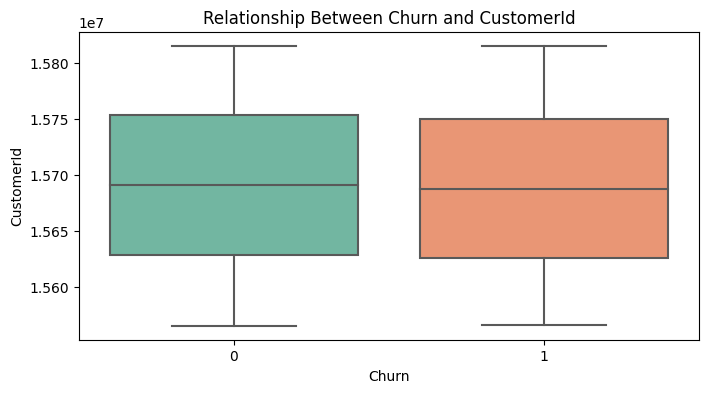

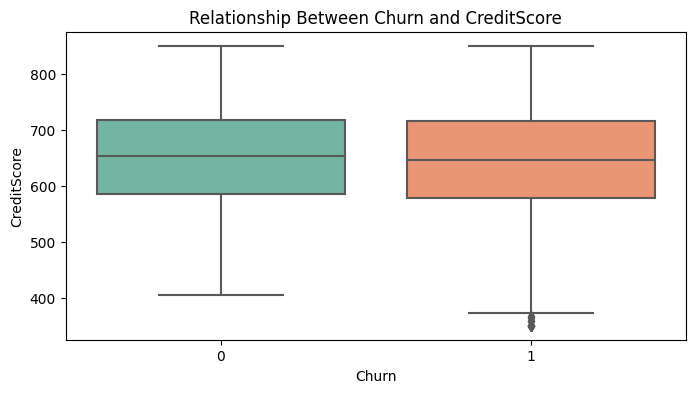

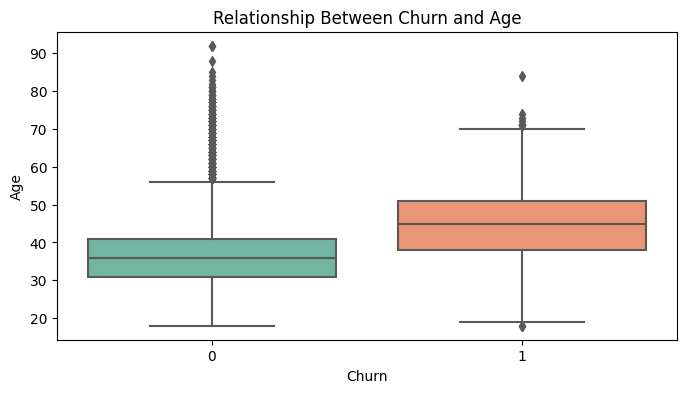

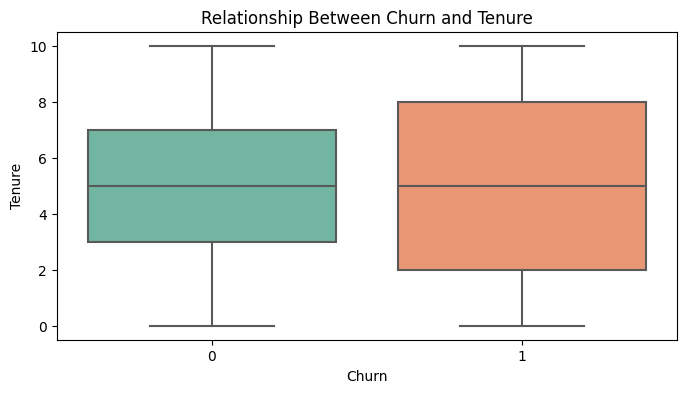

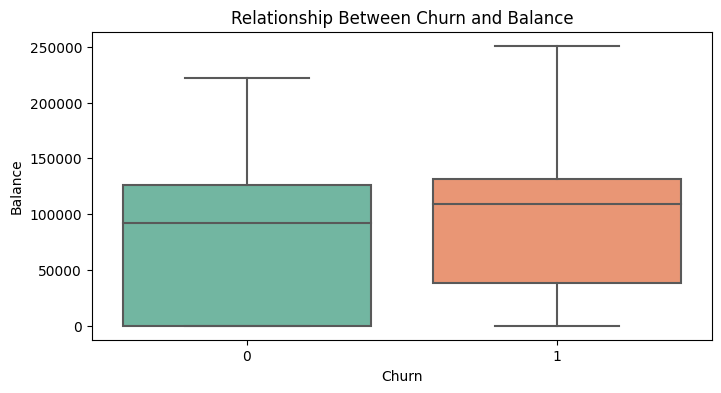

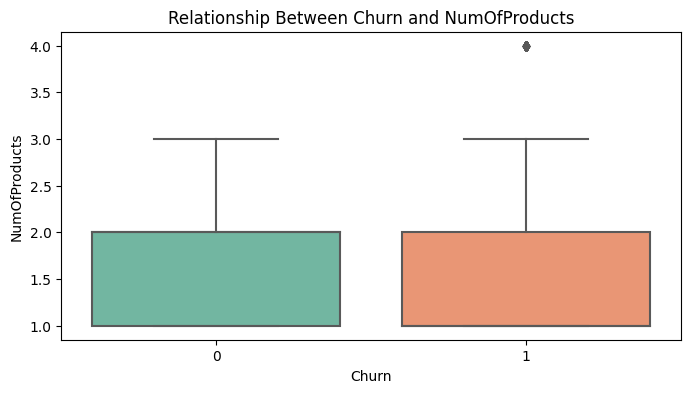

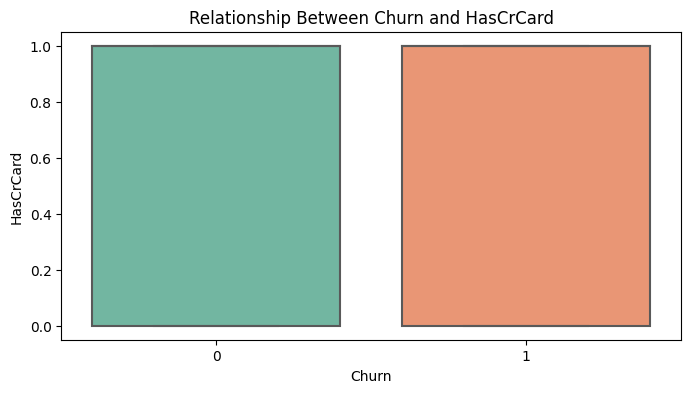

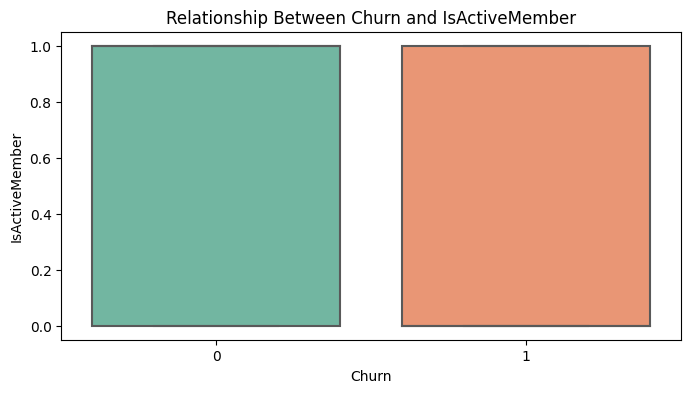

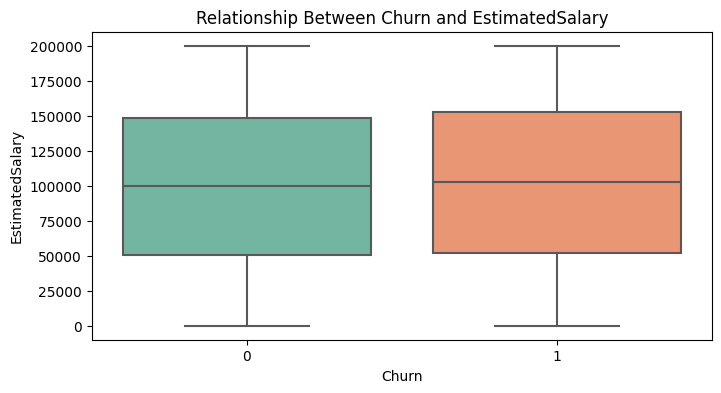

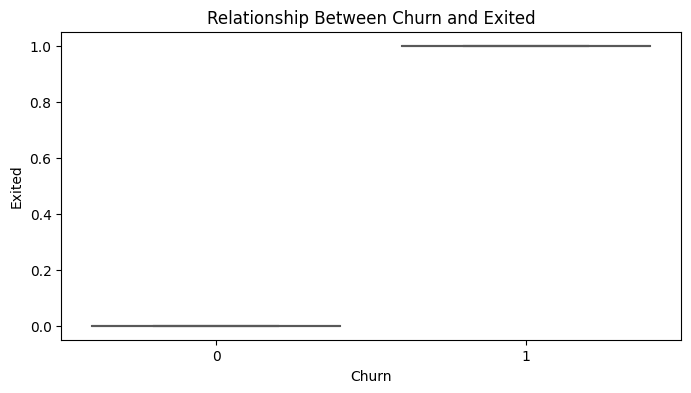

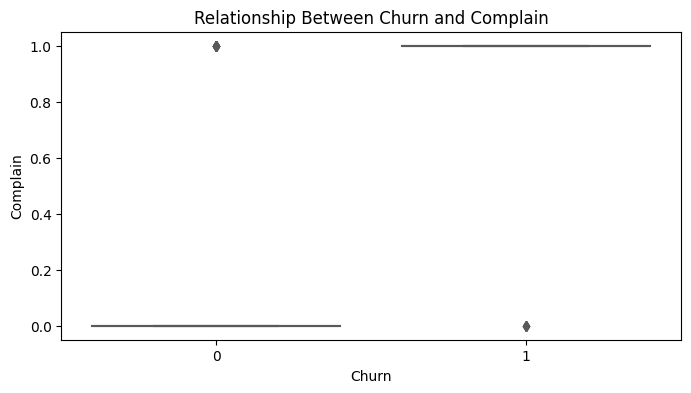

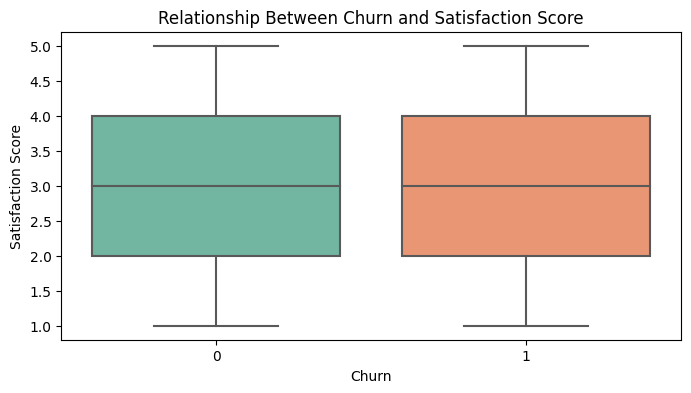

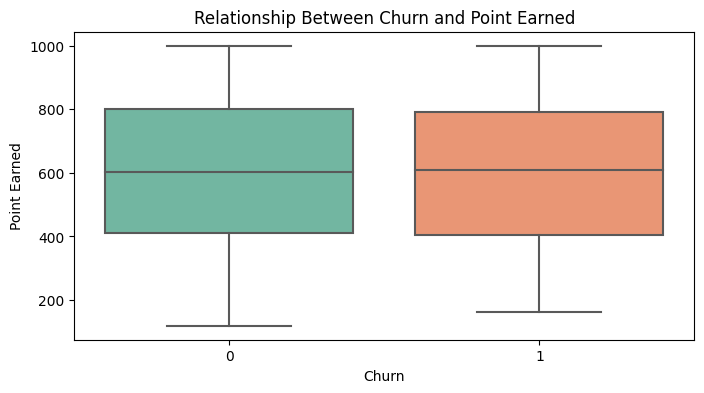

In [18]:
# Numerical features vs. target
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Exited', y=column, data=data, palette='Set2')
    plt.title(f'Relationship Between Churn and {column}')
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.show()

##  Feature Importance

In [14]:
# Drop rows with missing values and encode categorical variables for simplicity
data_cleaned = pd.get_dummies(data.dropna(), drop_first=True)
data_cleaned.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15598695,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,2,15649354,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,3,15737556,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,4,15671610,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,5,15625092,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False


In [15]:
# Split features and target variable
X = data_cleaned.drop('Exited', axis=1, errors='ignore')
y = data_cleaned['Exited']

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

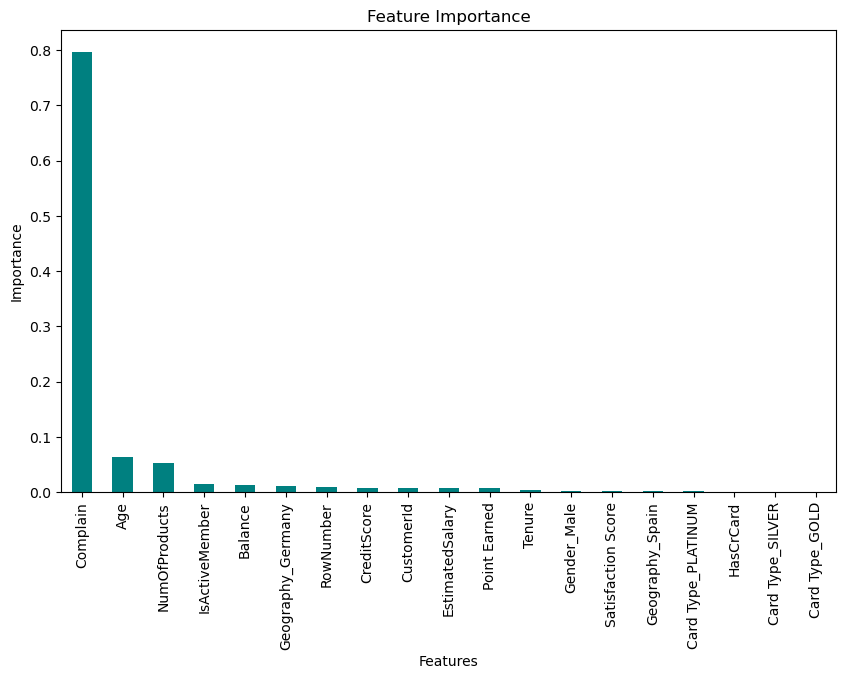

In [16]:
# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='teal')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

##  Summary of Observations

- The dataset exhibits a balanced or unbalanced distribution with respect to the target variable.
- Features with high correlations have been identified, which may need to be addressed to mitigate potential multicollinearity issues.
- Numerical features, such as Age and NumOfProducts, contain outliers that may influence the analysis and modeling process.
- Certain categorical variables, such as Geography and Gender, demonstrate significant relationships with the target variable, indicating their potential predictive importance.

# Model Training, Prediction and Evaluation
------------------------------
## Step 1: Data Preprocessing

In [18]:
# Splitting the data into features and target variable
X = data_cleaned.drop('Exited', axis=1)
y = data_cleaned['Exited']

In [19]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [20]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 2: Train and Test Multiple Models

In [22]:
# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

In [23]:
# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}\n")

Training Decision Tree...


Decision Tree - Accuracy: 1.00, Precision: 1.00, Recall: 1.00

Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.99, Precision: 0.99, Recall: 0.99

Training Logistic Regression...
Logistic Regression - Accuracy: 1.00, Precision: 1.00, Recall: 1.00

Training Random Forest...
Random Forest - Accuracy: 1.00, Precision: 1.00, Recall: 1.00

Training Support Vector Machine...
Support Vector Machine - Accuracy: 1.00, Precision: 1.00, Recall: 1.00

Training XGBoost...


/Users/lukas/anaconda3/envs/ai2024/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1737698291493/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 1.00, Precision: 1.00, Recall: 1.00

Training Gradient Boosting...
Gradient Boosting - Accuracy: 1.00, Precision: 1.00, Recall: 1.00

Training AdaBoost...


/Users/lukas/anaconda3/envs/ai2024/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 1.00, Precision: 1.00, Recall: 1.00

Training LightGBM...
[LightGBM] [Info] Number of positive: 5573, number of negative: 5573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 11146, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM - Accuracy: 1.00, Precision: 1.00, Recall: 1.00

Training CatBoost...
CatBoost - Accuracy: 1.00, Precision: 1.00, Recall: 1.00



## Step 3: Advanced Optimization and Hyperparameter Tuning

In [24]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Evaluate the tuned Random Forest model
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

results['Random Forest (Tuned)'] = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf
}

In [25]:
print("\033[1m" + "Result for Random Forest (Tuned):")
print("-"*100)
print("Best hyperparameters: ", grid_rf.best_params_)
print("-"*100)
print(results['Random Forest (Tuned)'])
print("-"*100)

Result for Random Forest (Tuned):
----------------------------------------------------------------------------------------------------
Best hyperparameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
----------------------------------------------------------------------------------------------------
{'Accuracy': 0.9983256592716618, 'Precision': 0.9991614255765199, 'Recall': 0.9974884889074926}
----------------------------------------------------------------------------------------------------


In [26]:
# Boosting model optimization using XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

# Evaluate the tuned XGBoost model
y_pred_xgb = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

results['XGBoost (Tuned)'] = {
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb
}


/Users/lukas/anaconda3/envs/ai2024/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1737698291493/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lukas/anaconda3/envs/ai2024/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1737698291493/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lukas/anaconda3/envs/ai2024/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1737698291493/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lukas/anaconda3/envs/ai2024/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:40] WARNING: /Us

In [27]:
print("\033[1m" + "Result for XGBoost (Tuned):")
print("-"*100)
print("Best hyperparameters: ", grid_xgb.best_params_)
print("-"*100)
print(results['XGBoost (Tuned)'])
print("-"*100)

Result for XGBoost (Tuned):
----------------------------------------------------------------------------------------------------
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
----------------------------------------------------------------------------------------------------
{'Accuracy': 0.9976977814985349, 'Precision': 0.9983235540653814, 'Recall': 0.9970699037254082}
----------------------------------------------------------------------------------------------------


## Step 4: Handle Outliers and Reduce Overfitting

In [28]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Retrain a model (e.g., Logistic Regression) after PCA
lr_pca = LogisticRegression(random_state=42)
lr_pca.fit(X_train_pca, y_train)

# Evaluate the model
y_pred_pca = lr_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)

results['Logistic Regression (PCA)'] = {
    'Accuracy': accuracy_pca,
    'Precision': precision_pca,
    'Recall': recall_pca
}

In [33]:
print("\033[1m" + "Result for Logistic Regression (PCA):")
print("-"*100)
print(results['Logistic Regression (PCA)'])
print("-"*100)

Result for Logistic Regression (PCA):
----------------------------------------------------------------------------------------------------
{'Accuracy': 0.9922561741314357, 'Precision': 0.9974619289340102, 'Recall': 0.9870238593553788}
----------------------------------------------------------------------------------------------------


## Step 5: Compare Model Performances

In [32]:
# Create a summary DataFrame
results_df = pd.DataFrame(results).T

# Display the results
# print(results_df)

# print("\nModel Performance Summary:")
results_df

,Accuracy,Precision,Recall
Decision Tree,0.997279,0.997487,0.997070
K-Nearest Neighbors,0.987442,0.986221,0.988698
Logistic Regression,0.997698,0.999160,0.996233
Random Forest,0.998326,0.999161,0.997488
Support Vector Machine,0.997698,0.999160,0.996233
XGBoost,0.997907,0.998742,0.997070
Gradient Boosting,0.998535,0.999581,0.997488
AdaBoost,0.997907,0.999161,0.996651
LightGBM,0.997070,0.997904,0.996233
CatBoost,0.998116,0.999161,0.997070


# **Final Conclusion**

Based on the performance metrics (accuracy, precision, and recall), the following conclusions can be drawn:

#### 1. **Overall Best Model**:
   - The **Gradient Boosting** algorithm demonstrates the best overall performance with the highest accuracy (0.998535), precision (0.999581), and a high recall (0.997488). This makes it the most balanced and reliable model for the given data.
   

#### 2. **Other Strong Performers**:
   - **Random Forest** (both untuned and tuned) and **Logistic Regression** exhibit excellent performance, with accuracy, precision, and recall values very close to Gradient Boosting. These models are also viable alternatives, especially in cases where interpretability or computational efficiency may be a consideration.
   - **XGBoost** and its tuned variant also perform well, with accuracy and recall values slightly lower than Gradient Boosting.

#### 3. **Relatively Lower Performance**:
   - Models like **K-Nearest Neighbors** and **Logistic Regression (with PCA)** have slightly lower metrics compared to the top-performing models. While still effective, these may not be ideal for tasks requiring high precision or recall.

#### 4. **Trade-Offs**:
   - Models such as **Support Vector Machine** and **Logistic Regression** exhibit high precision (0.999160) but slightly lower recall values compared to Gradient Boosting and Random Forest. This suggests they may perform better in applications prioritizing precision over recall.


#
For applications that demand the highest accuracy and balanced precision and recall, **Gradient Boosting** is the preferred choice. However, if computational resources or interpretability are priorities, **Random Forest** (tuned) or **Logistic Regression** can be considered as strong alternatives.